# **Introduction:**
This program was created for generating data for TME 6015, such that 
a Neural Network could be trained for use in multi-robot task allocation
(MRTA).

The proposed scenario is a warehouse environment where tasks are payloads, 
and they can either require:
* a small load capacity
* a medium load capacity
* a large load capacity

Therefore the 3 classes of robots are Small, Medium, and Large. Each robot class
can only complete a task of a matching class.


# **Import Packages:**

Need to import the following packages:

In [15]:
# import:
import pandas as pd
import numpy as np
from PythonFISFunction import *
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# **Generate the Data:**

Need to randomly generate robot data, as well as a robot capability and task requirement:

In [ ]:
# define parameters:
strings = ['Small', 'Medium', 'Large']
data_size = 10000
columns = ['Load History', 'Distance to Task', 'Total Distance Travelled', 
           'Robot Type', 'Task Type', 'Capability Match?', 'Suitability']
df = pd.DataFrame(np.zeros((data_size, len(columns))), columns = columns)

rule_base = fis_create()

result = np.random.randint(0, 2, size=data_size)  # 0 or 1 for match/no-match

# assign a random task regardless of if result is zero:
task_types = np.where(result == 0, np.random.choice(strings, size=data_size), np.random.choice(strings, size=data_size))
# where the result is 0, set the robot type to the task type. if not, set to random:
robot_types = np.where(result == 0, task_types, np.random.choice(strings, size=data_size))

# Randomly generate other data
loads = np.random.randint(0, 10, size=data_size)
dtts = np.random.uniform(0, 25, size=data_size)
tdts = np.random.uniform(0, 50, size=data_size)

capabilities = (task_types == robot_types).astype(int)

suitability = [fis_solve(rule_base, load, dtt, tdt, cap) 
               for load, dtt, tdt, cap in zip(loads, dtts, tdts, capabilities)]

# Fill DataFrame
df['Load History'] = loads
df['Distance to Task'] = dtts
df['Total Distance Travelled'] = tdts
df['Robot Type'] = robot_types
df['Task Type'] = task_types
df['Capability Match?'] = capabilities
df['Suitability'] = suitability

# **Data Analysis:**

Analyze the data frame that was generated:

In [96]:
# remove low value and replace with zero, as it should be:
df['Suitability'] = df['Suitability'].apply(lambda x: 0 if x < 0.15 else x)

# get summary statistics:
print('summary statistics are:')
df.describe()

summary statistics are:


,Load History,Distance to Task,Total Distance Travelled,Capability Match?,Suitability
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.495700,12.321704,25.052905,0.660800,2.891453
std,2.875762,7.155306,14.487886,0.473461,2.415875
min,0.000000,0.010668,0.008861,0.000000,0.000000
25%,2.000000,6.171467,12.526882,0.000000,0.000000
50%,4.000000,12.285400,25.196317,1.000000,3.256553
75%,7.000000,18.412143,37.601906,1.000000,4.893039
max,9.000000,24.999810,49.996917,1.000000,9.301782


In [97]:
# get head:
print('top five rows are:')
df.head(10)

top five rows are:


,Load History,Distance to Task,Total Distance Travelled,Robot Type,Task Type,Capability Match?,Suitability
0,9,20.540772,27.597702,Large,Large,1,2.094455
1,2,10.080196,38.724002,Small,Small,1,5.078582
2,8,8.690871,29.982843,Large,Small,0,0.000000
3,5,9.835623,37.867265,Small,Small,1,3.919463
4,1,0.416514,13.785328,Medium,Large,0,0.000000
5,6,22.022368,41.682977,Small,Small,1,1.533857
6,3,21.526918,46.457266,Small,Small,1,2.571079
7,1,10.323034,36.546152,Large,Large,1,5.734623
8,3,9.924901,20.932862,Small,Small,1,5.007826
9,4,4.435074,38.906418,Medium,Medium,1,5.200229


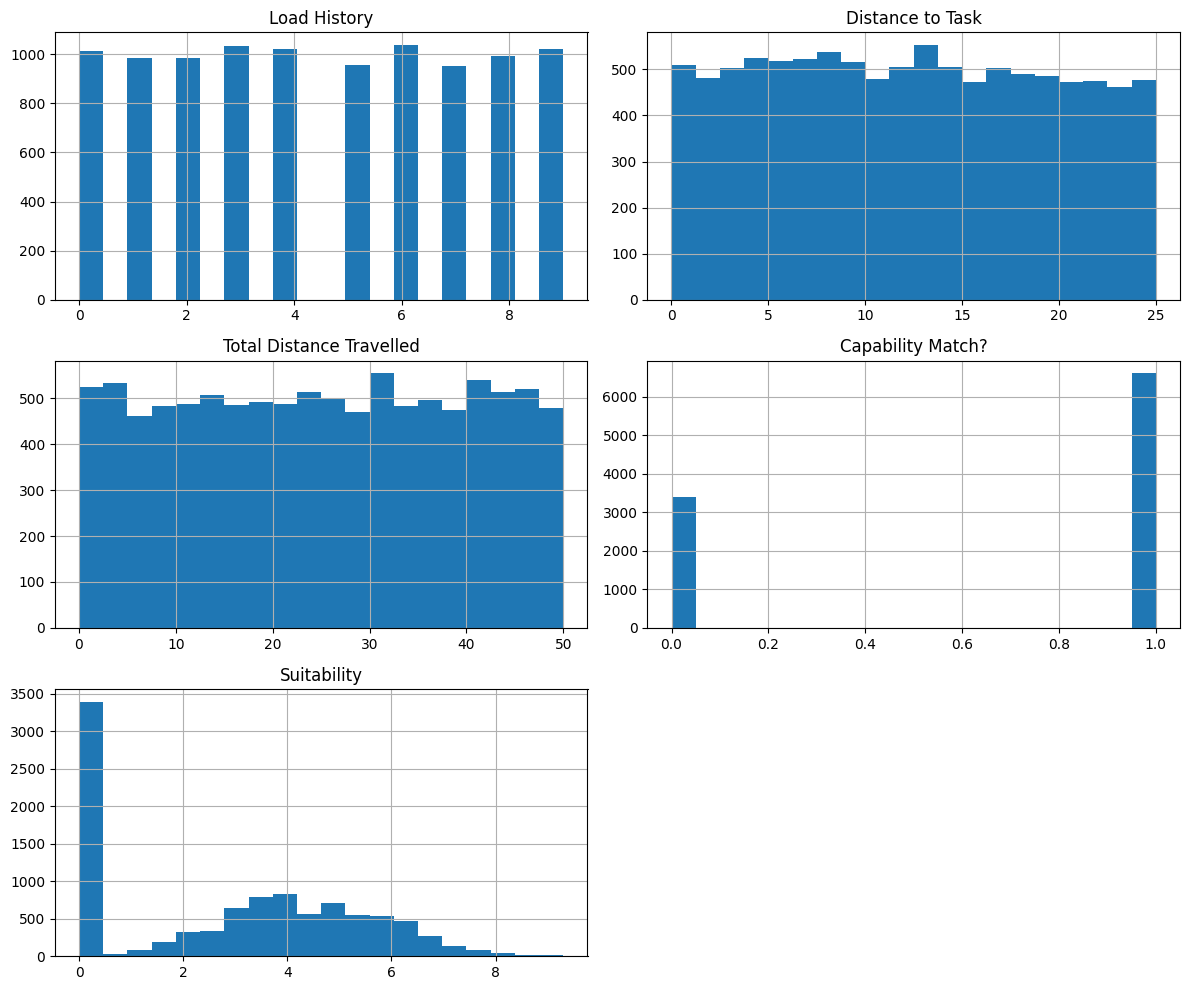

In [ ]:
# visualize distribution of values:
df.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

# **Export Data:**

The data needs to be exported such that it can be used to train the model.

In [99]:
# export to csv:
df.to_csv('data.csv', index = False)